## MACHINE_LEANING


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aims_house_data.csv to aims_house_data.csv


#IMPORT LIBRARIES

In [ ]:
#we use pandas to manipulate dataset as frame
import pandas as pd
#We use numpy for matricial operation
import numpy as np
#matplotlib for plotting 
import matplotlib.pyplot as plt
#sklearn is a ml lib that allows easily processing ml algorithsms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Loading data



In [ ]:
df = pd.read_csv('aims_house_data.csv')

#Description of the dataset

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

We have 21612 observations and 21 features in our Data. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  object 
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long  

We observe that our target variable have type object. To use it we have to change the type to make it as float variable.

In [ ]:
df['price'].astype(float)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Univariate linear regression : predict price from surface_home


## Task 1: display the scatter plot of the rent amount as a function of the surface area.

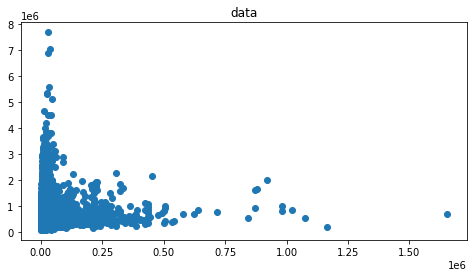

In [ ]:
# extracting features price and surface
x_df = df['sqft_lot']
y_df= df['price']
# transforming into matrix
x_df = np.array(x_df)
y_df = np.array(y_df)
plt.figure(figsize=(8,4))
plt.title("data")
plt.scatter(x_df,y_df)

## Task 2 :Observation and Hypothesis. 

### Observation
Observing the plot it is appears that there is not linear relationship between area and the price of house. The hypothesis we can make now is that the area doesn't explain the price of the house.


### Hypothesis 
$price = Θ_0 + Θ_1 * surface$

## Task 3 : Using the solution of the minimization equation, find the value of the parameters that best approximate the training data

In [ ]:
from sklearn.model_selection import train_test_split

new_data = pd.concat([df['price'],df['sqft_lot']], axis=1)

#splitting data into trainning and testing data

df_train, df_test = train_test_split(new_data, train_size=0.8, test_size=0.2)
x_train = df_train['sqft_lot']
y_train = df_train['price']
x_test = df_test['sqft_lot']
y_test = df_test['price']

In [ ]:
# minimization method
t=len(x_train)
x=np.array([np.ones(t), df_train['sqft_lot'].values]).T
y=y_train
param=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(param)

[5.26499001e+05 8.39883373e-01]


## Task 4: Replace the parameter values in the hθ(x) hypothesis and plot the straight line we found, to check that it fits the data.

From Task 3 we obtain the following linear regression

$price = 5.26499001e+05 + 8.39883373e-01 * surface $
 with 

 $Θ_0 = 5.26499001e+05 $ and $Θ_1 = 8.39883373e-01$

##  PLotting the straight line :

 $price = 5.26499001e+05 + 8.39883373e-01 * surface $

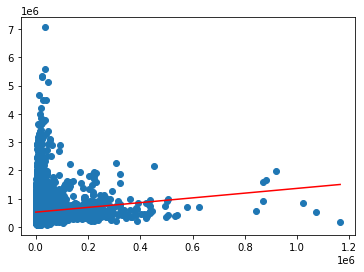

In [ ]:
y_pred = param[1]*x_train + param[0]
plt.scatter(x_train, y_train)
plt.plot([min(x_train), max(x_train)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()

# Task 5 : Prediction 5400 feet2 et 12500 feet2

In [ ]:
predict1 = param[1]*5400 + param[0]
predict2 = param[1]*12500 + param[0]
print(predict1, predict2)

531034.3710329296 536997.5429779463


So we have the price of house with 5400 feet^2 is 531034.3710329296 and for 12 500feet^2 is 536997.5429779463

# Task 6: Estimation of parameter wiht  linear_model function available in package scikit-learn 

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)


In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
p0=model.intercept_
p1=model.coef_
print('thetha0 is : ',p0, 'thetha1: is ',p1)


thetha0 is :  528889.8952284724 thetha1: is  [0.72531038]


# Multivariate linear regression : predict house price with more features

#Task 1: Let us discuss about the feature analysis and evaluated the correlation of the features to the house price.

In [ ]:

new_data1 = pd.concat([df['price'],df['bedrooms'],df['bathrooms'],df['sqft_living'],df['floors'],df['sqft_lot'],df['waterfront'],df['view'],df['condition'],df['grade'],df['yr_built'],df['yr_renovated']], axis=1)

df_train, df_test = train_test_split(new_data1, train_size=0.8, test_size=0.2)


In [ ]:
new_data1.head()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_lot,waterfront,view,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,1.0,5650,0,0,3,7,1955,0
1,538000.0,3,2.25,2570,2.0,7242,0,0,3,7,1951,1991
2,180000.0,2,1.00,770,1.0,10000,0,0,3,6,1933,0
3,604000.0,4,3.00,1960,1.0,5000,0,0,5,7,1965,0
4,510000.0,3,2.00,1680,1.0,8080,0,0,3,8,1987,0


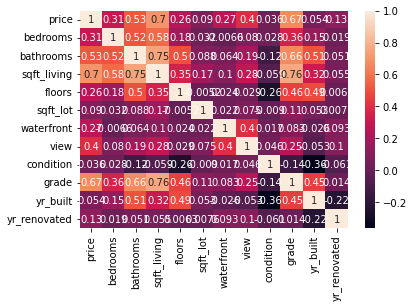

In [ ]:
import seaborn as sn

corrMatrix = new_data1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Comment of correlation

We observe that the surfave of living, the grade are  highly correlated to the price of house. 